# Question 1

### Define each of the following machine learning terms:
- **dataset**: a collection of data.  Can be labelled or unlabelled, and in the context of machine learning, is used to train and test models that when given an input, will predict an output.
- **training, testing, validation dataset**: training set is used to train a machine learning model, testing set is used to test the accuracy of a model, and a validation dataset is used to tune hyperparameters
- **ground truth, label**: ground truth is the ideal expected result when a model makes a prediction.  It is the "true" value for a label or value.  The label is the thing you are predicting, and training data can be "labeled" with the ground truth output
- **pre-processing, feature, numerical, nominal**: pre processing is the act of cleaning and transforming data before it is fit to be prcoessed and used to train a model.  A feature is property or characteristic of the target you are trying to predict.  Nominal data is data that cannot be ordered or ranked, whereas numerical data can, as it is based in numbers.
- **decision surface**: a decision surface partitions into sets for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class
- **model validation, accuracy, cross-validation**: model validation is the task of confirming that the outputs from a model are acceptable and sufficiently accurate.  Accuracy is the amount of correct predictions divided by the total predictions, and cross validation measures how a model can be generalized to more data


# Question 2

### Pick two of the Scikit-learn datasets which are already included in the library (i.e. the ones with datasets_load_) and find out the following:
- the number of data points
- the number of features and their types
- the number and name of categories (i.e. the target field)
- the mean (or mode if nominal) of the first two features

In [44]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
# chose the wine and breast cancer datasets.  
wine = datasets.load_wine()
wineList = list(zip(wine.data, wine.target))
breastCancer = datasets.load_breast_cancer()
bcList = list(zip(breastCancer.data, breastCancer.target))


print(f'Number of data points in the diabetes training set, N= {len(wineList)} \n')
print(f'Number of data points in the breast cancer training set, N= {len(bcList)} \n')

print(f'Number of features for each point in the wine training set, N= {len(wineList[0][0])}')
print('The wine features are: ' , wine.feature_names, '\n')
print(f'Number of features for each point in the breast cancer training set, N= {len(bcList[0][0])} \n')
print('The breast cancer features are: ', breastCancer.feature_names)

print("for both data sets, all features are expressed as numerical values")

print(f'Number of targets in the wine training set, N= {len(wine.target_names)} \n')
print('The wine targets are: ' , wine.target_names, '\n')
print(f'Number of features for each point in the breast cancer training set, N= {len(breastCancer.target_names)} \n')
print('The breast cancer targets are: ', breastCancer.target_names, '\n')


cancer_df = pd.DataFrame(
 data= np.c_[breastCancer.data, [breastCancer.target_names[v] for v in
breastCancer.target]],
 columns= list(breastCancer.feature_names) + ['diagnosis'])

wine_df = pd.DataFrame(
 data= np.c_[wine.data, [wine.target_names[v] for v in
wine.target]],
 columns= wine.feature_names + ['wine'])


wine_df['alcohol'] = wine_df['alcohol'].astype(float)
del wine_df["wine"]
wine_df = wine_df.astype(float)
print('The first 2 features in the wine dataset, alcohol, and malic acid, have mean values ', wine_df["alcohol"].mean(axis=0), "and ", wine_df["malic_acid"].mean(axis=0))
del cancer_df["diagnosis"]
cancer_df = cancer_df.astype(float)
print('The first 2 features in the cancer dataset, mean radius, and mean texture, have mean values ', cancer_df["mean radius"].mean(axis=0), "and ", cancer_df["mean texture"].mean(axis=0))

Number of data points in the diabetes training set, N= 178 

Number of data points in the breast cancer training set, N= 569 

Number of features for each point in the wine training set, N= 13
The wine features are:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

Number of features for each point in the breast cancer training set, N= 30 

The breast cancer features are:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compa

# Question 3

### Use the code below to display feature pairs

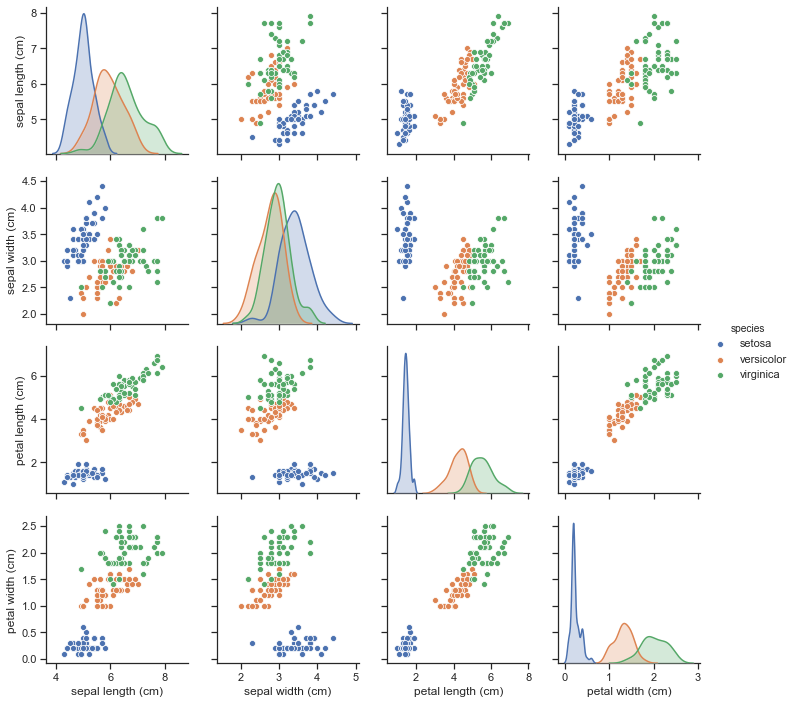

In [37]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
 data= np.c_[iris.data, [iris.target_names[v] for v in
iris.target]],
 columns= iris.feature_names + ['species'])
cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')

-**From the plots, which feature(s) shows the most promising discriminating power for
machine learning?**: petal length and width seem to best differentiate between the species

-Now plot the features for the datasets you tried in question 2, hoping the number of
features are low and plots look not too small. If there are too many features, then switch the
dataset or update your code (pandas Dataframe line) to look at low number of features at a
time.

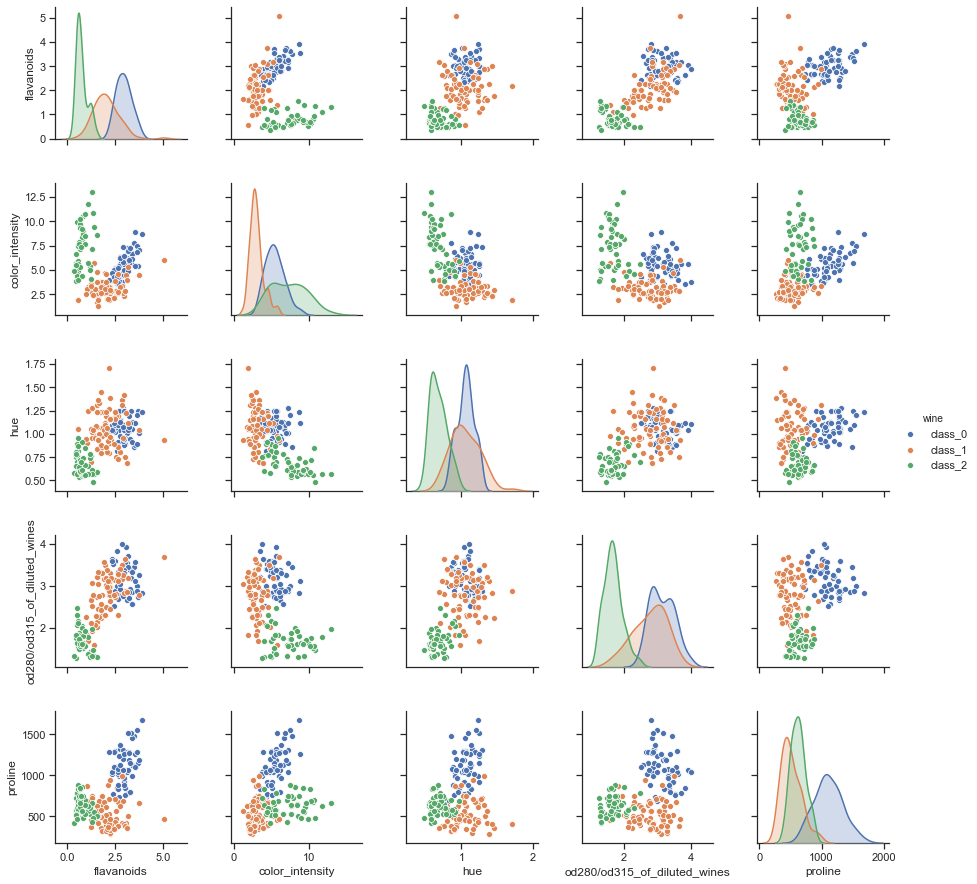

In [38]:
wine_df = pd.DataFrame(
 data= np.c_[wine.data, [wine.target_names[v] for v in
wine.target]],
 columns= wine.feature_names + ['wine'])
cols = wine_df.columns.drop('wine')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
cols = wine_df.drop(wine_df.columns[[0,1,2,3,4,5,7,8]], axis = 1, inplace = True)
g = sns.pairplot(wine_df, hue='wine')

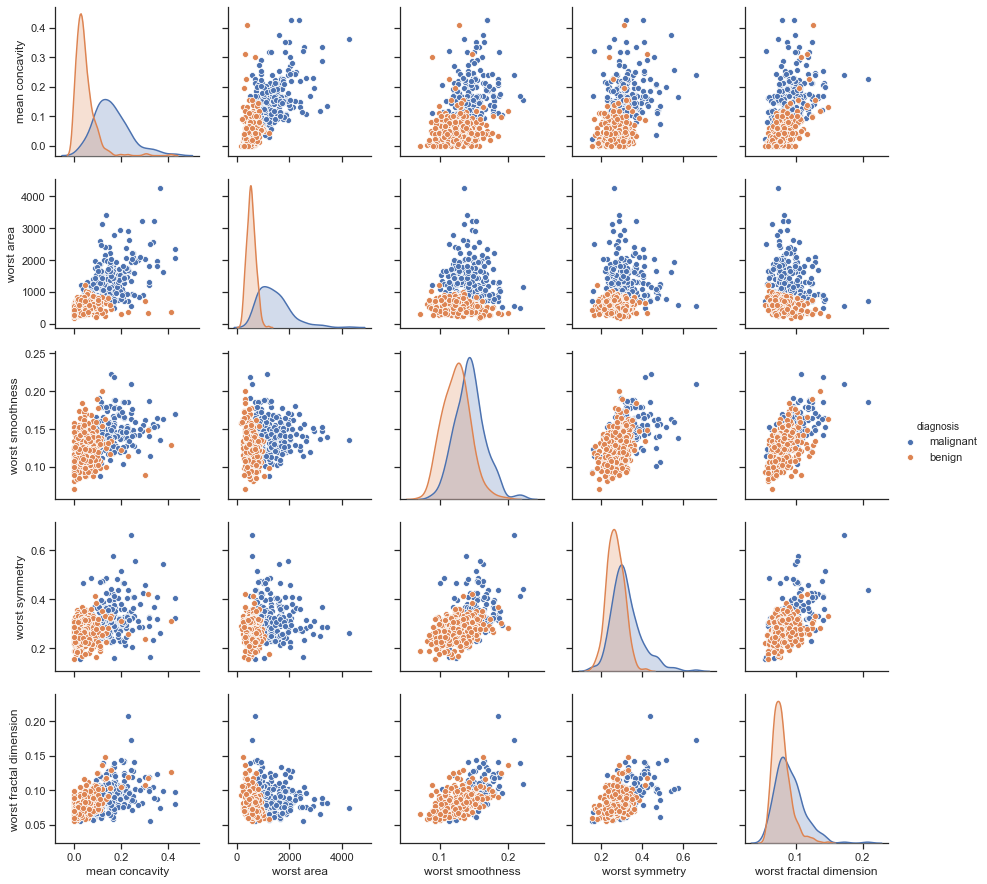

In [39]:
cancer_df = pd.DataFrame(
 data= np.c_[breastCancer.data, [breastCancer.target_names[v] for v in
breastCancer.target]],
 columns= list(breastCancer.feature_names) + ['diagnosis'])
cols = cancer_df.columns.drop('diagnosis')
cancer_df[cols] = cancer_df[cols].apply(pd.to_numeric)
cols = cancer_df.drop(cancer_df.columns[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27]], axis = 1, inplace = True)
g = sns.pairplot(cancer_df, hue='diagnosis')

# Question 4

### Refer to the plots in the previous question and discuss an unsupervised approach to group the dataset into non-overlapping clusters. Answer the following questions:
- Which features would you use?: for the wine dataset, I would look at proline vs other features, as these plots seemed to create the most distinct clusters.  For the cancer dataset, worst area, and mean concavity seemed to create the most distinct clusters
- Are three clusters obvious?: in the wine dataset, there are 3 possible classes to which a data point may be classified, so there are 3 clusters.  However, the cancer dataset is an example of binary classification, so for the most part, there are only 2 clusters.
- What about four clusters? Roughly mark them on a few plots.: There were n o examples of 4 clusters on my plots
- For this problem, is there any relation between classification and clustering since the labels are already given?: Yes - the clusters (ideally) are made up of datapoints from the same class.

# Question 5

### Using the scikit-learn class descriptions for Naive Bayes and decision trees, classify the Iris dataset in question 3. Your code should be very similar to that in the Module 1 Jupyter notebook. In cell 5 the dataset is divided into two portions, one for training the other for testing. Make sure you use the same input data for the Naive Bayes classifier and decision tree classifier.
#### Answer the following questions:
- Which classifier has the highest performance?: based on the results before, the decision tree outperforms NB
- More training helps? Verify by increasing the training dataset size.: More training helps to a certain degree- as shown in the results from the naive bayes model, performance peaks, then actually decreases when the training set is increased, and the test size is decreased
- Will the performance plateau? Show it on a plot.: see plot below

In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

performanceDF = pd.DataFrame(columns=['test points', 'nb accuracy', 'tree accuracy'])

In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Naive Bayes results: Accuracy for %d test points : %f percent" % (X_test.shape[0], accuracy*100))
treeModel = tree.DecisionTreeClassifier()
y_pred = treeModel.fit(X_train, y_train).predict(X_test)
treeAccuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Decision Tree results: Accuracy for %d test points : %f percent" % (X_test.shape[0],treeAccuracy*100))
performanceDF = performanceDF.append({'test points': X_test.shape[0], 'nb accuracy': accuracy, 'tree accuracy':treeAccuracy}, ignore_index=True)

Naive Bayes results: Accuracy for 75 trained points : 94.666667 percent
Decision Tree results: Accuracy for 75 trained points : 96.000000 percent


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Naive Bayes results: Accuracy for %d trained points : %f percent" % (X_test.shape[0], accuracy*100))
treeModel = tree.DecisionTreeClassifier()
y_pred = treeModel.fit(X_train, y_train).predict(X_test)
treeAccuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Decision Tree results: Accuracy for %d trained points : %f percent" % (X_test.shape[0],treeAccuracy*100))
performanceDF = performanceDF.append({'training points': X_test.shape[0], 'nb accuracy': accuracy, 'tree accuracy':treeAccuracy}, ignore_index=True)

Naive Bayes results: Accuracy for 60 trained points : 93.333333 percent
Decision Tree results: Accuracy for 60 trained points : 95.000000 percent


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Naive Bayes results: Accuracy for %d trained points : %f percent" % (X_test.shape[0], accuracy*100))
treeModel = tree.DecisionTreeClassifier()
y_pred = treeModel.fit(X_train, y_train).predict(X_test)
treeAccuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Decision Tree results: Accuracy for %d trained points : %f percent" % (X_test.shape[0],treeAccuracy*100))
performanceDF = performanceDF.append({'training points': X_test.shape[0], 'nb accuracy': accuracy, 'tree accuracy':treeAccuracy}, ignore_index=True)

Naive Bayes results: Accuracy for 45 trained points : 100.000000 percent
Decision Tree results: Accuracy for 45 trained points : 97.777778 percent


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Naive Bayes results: Accuracy for %d trained points : %f percent" % (X_test.shape[0],accuracy*100))
treeModel = tree.DecisionTreeClassifier()
y_pred = treeModel.fit(X_train, y_train).predict(X_test)
treeAccuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Decision Tree results: Accuracy for %d trained points : %f percent" % (X_test.shape[0],treeAccuracy*100))
performanceDF = performanceDF.append({'training points': X_test.shape[0], 'nb accuracy': accuracy, 'tree accuracy':treeAccuracy}, ignore_index=True)

Naive Bayes results: Accuracy for 30 trained points : 96.666667 percent
Decision Tree results: Accuracy for 30 trained points : 100.000000 percent


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Naive Bayes results: Accuracy for %d test points : %f percent" % (X_test.shape[0], accuracy*100))
treeModel = tree.DecisionTreeClassifier()
y_pred = treeModel.fit(X_train, y_train).predict(X_test)
treeAccuracy = (X_test.shape[0]-(y_test != y_pred).sum())/X_test.shape[0]
print("Decision Tree results: Accuracy for %d test points : %f percent" % (X_test.shape[0],treeAccuracy*100))
performanceDF = performanceDF.append({'test points': X_test.shape[0], 'nb accuracy': accuracy, 'tree accuracy':treeAccuracy}, ignore_index=True)

Naive Bayes results: Accuracy for 15 trained points : 93.333333 percent
Decision Tree results: Accuracy for 15 trained points : 100.000000 percent


In [136]:
print(performanceDF)

   training points  nb accuracy  tree accuracy
0             75.0     0.946667       0.960000
1             60.0     0.933333       0.950000
2             45.0     1.000000       0.977778
3             30.0     0.966667       1.000000
4             15.0     0.933333       1.000000


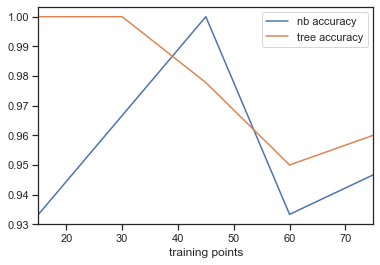

In [138]:
performanceDF.plot(x = 'training points')